# Comparing Classification Models

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
from math import sqrt
import matplotlib.pyplot as plt
import time
import random

In [24]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from itertools import product
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import logistic
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
import lightgbm as lgb
import catboost as cat

In [25]:
data=pd.read_csv('./otto_train.csv')

In [26]:
data.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [27]:
data.count

<bound method DataFrame.count of           id  feat_1  feat_2  feat_3  feat_4  feat_5  feat_6  feat_7  feat_8  \
0          1       1       0       0       0       0       0       0       0   
1          2       0       0       0       0       0       0       0       1   
2          3       0       0       0       0       0       0       0       1   
3          4       1       0       0       1       6       1       5       0   
4          5       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
61873  61874       1       0       0       1       1       0       0       0   
61874  61875       4       0       0       0       0       0       0       0   
61875  61876       0       0       0       0       0       0       0       3   
61876  61877       1       0       0       0       0       0       0       0   
61877  61878       0       0       0       0       0       0       0       0   

      

In [28]:
len(data)

61878

In [29]:
classes={
    "Class_1": 1,
    "Class_2": 2,
    "Class_3": 3,
    "Class_4": 4,
    "Class_5": 5,
    "Class_6": 6,
    "Class_7": 7,
    "Class_8": 8,
    "Class_9": 9
}

In [30]:
data=data.drop(['id'],axis=1)

In [31]:
temp_data=pd.DataFrame(columns=data.columns)
for class_name in classes.keys():
    sample_data=data[data['target']==class_name]
    size=sample_data.shape[0]
    random_index=random.sample(list(np.arange(size)),size//8)
    temp_data=temp_data.append(pd.DataFrame(sample_data.iloc[random_index],columns=data.columns))

In [32]:
data=temp_data

In [33]:
len(data)

7731

In [34]:
target_data=data['target'].apply(lambda x: classes[x])

In [35]:
target_data.dtypes

dtype('int64')

In [36]:
feature_names=data.columns.difference(['target'])
feature_names

Index(['feat_1', 'feat_10', 'feat_11', 'feat_12', 'feat_13', 'feat_14',
       'feat_15', 'feat_16', 'feat_17', 'feat_18', 'feat_19', 'feat_2',
       'feat_20', 'feat_21', 'feat_22', 'feat_23', 'feat_24', 'feat_25',
       'feat_26', 'feat_27', 'feat_28', 'feat_29', 'feat_3', 'feat_30',
       'feat_31', 'feat_32', 'feat_33', 'feat_34', 'feat_35', 'feat_36',
       'feat_37', 'feat_38', 'feat_39', 'feat_4', 'feat_40', 'feat_41',
       'feat_42', 'feat_43', 'feat_44', 'feat_45', 'feat_46', 'feat_47',
       'feat_48', 'feat_49', 'feat_5', 'feat_50', 'feat_51', 'feat_52',
       'feat_53', 'feat_54', 'feat_55', 'feat_56', 'feat_57', 'feat_58',
       'feat_59', 'feat_6', 'feat_60', 'feat_61', 'feat_62', 'feat_63',
       'feat_64', 'feat_65', 'feat_66', 'feat_67', 'feat_68', 'feat_69',
       'feat_7', 'feat_70', 'feat_71', 'feat_72', 'feat_73', 'feat_74',
       'feat_75', 'feat_76', 'feat_77', 'feat_78', 'feat_79', 'feat_8',
       'feat_80', 'feat_81', 'feat_82', 'feat_83', 'feat_84

In [37]:
data[feature_names]=data[feature_names].astype('int32')

In [38]:
X=data[feature_names]
y=target_data
train_X,test_X,train_Y,test_Y=train_test_split(X,y, test_size=0.3, random_state=42)
print(train_X.shape, train_Y.shape,test_X.shape,test_Y.shape)

(5411, 93) (5411,) (2320, 93) (2320,)


## Naive bayes Classification

In [17]:
start=time.time()
nb_classification_model=GaussianNB()
nb_classification_model=nb_classification_model.fit(train_X,train_Y)
nb_predict=nb_classification_model.predict(test_X)

nb_accuracy=accuracy_score(nb_predict,test_Y)
nb_time=time.time()-start

In [18]:
print(nb_accuracy,nb_time)

0.5155172413793103 0.07480120658874512


In [56]:
start=time.time()
nb_classification_model=MultinomialNB()
nb_classification_model=nb_classification_model.fit(train_X,train_Y)
nb_predict=nb_classification_model.predict(test_X)

nb_accuracy=accuracy_score(nb_predict,test_Y)
nb_time=time.time()-start

In [57]:
print(nb_accuracy,nb_time)

0.6625 0.009972572326660156


## SVC (SVM Classification Model)

In [19]:
# Linear Kernel SVM(Gaussian)
C=1.0
start=time.time()
svm_classification_model=svm.SVC(kernel='linear',C=C,max_iter=10000)
svm_classification_model=svm_classification_model.fit(train_X,train_Y)
svm_linear_predict=svm_classification_model.predict(test_X)
svm_accuracy=accuracy_score(svm_linear_predict,test_Y)
svm_time=time.time() - start # 코드 실행 시간 계산

C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [20]:
#Regularization parameter
svm_models = (svm.LinearSVC(C=C,random_state=0),
          svm.SVC(kernel='rbf', gamma=0.7, C=C,random_state=0),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C)
             )
svm_models = (clf.fit(train_X, train_Y) for clf in svm_models)
for svm_model in svm_models:
    svm_predict=svm_model.predict(test_X)
    print("Accuracy: %.2f" %accuracy_score(svm_predict,test_Y))

C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy: 0.74
Accuracy: 0.29
Accuracy: 0.70


In [21]:
# Linear Kernel SVM(Gaussian)
C=1.0
start=time.time()
svm_classification_model=svm.LinearSVC(C=C,random_state=0,max_iter=10000)
svm_classification_model=svm_classification_model.fit(train_X,train_Y)
svm_linear_predict=svm_classification_model.predict(test_X)
svm_accuracy=accuracy_score(svm_linear_predict,test_Y)
svm_time=time.time() - start # 코드 실행 시간 계산

C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [22]:
print(svm_accuracy,svm_time)

0.743103448275862 15.355942964553833


In [23]:
len(svm_classification_model.coef_)

9

## KNN Classification

1 0.7129310344827586
2 0.7155172413793104
3 0.7318965517241379
4 0.7375
5 0.7413793103448276
6 0.7426724137931034
7 0.7413793103448276
8 0.7396551724137931
9 0.7482758620689656
10 0.7452586206896552
11 0.7482758620689656
12 0.7435344827586207
13 0.743103448275862
14 0.740948275862069
15 0.7353448275862069
16 0.7353448275862069
17 0.7327586206896551
18 0.7336206896551725
19 0.728448275862069
20 0.7293103448275862
21 0.7310344827586207
22 0.7314655172413793
23 0.7258620689655172
24 0.7275862068965517
25 0.7275862068965517
26 0.7258620689655172
27 0.7280172413793103
28 0.7258620689655172
29 0.7241379310344828
30 0.725
31 0.721551724137931
32 0.7198275862068966
33 0.719396551724138
34 0.7202586206896552
35 0.7206896551724138
36 0.7202586206896552
37 0.719396551724138
38 0.7185344827586206
39 0.7189655172413794
40 0.7185344827586206
41 0.7198275862068966
42 0.715948275862069
43 0.7189655172413794
44 0.7176724137931034
45 0.7168103448275862
46 0.718103448275862
47 0.715948275862069
48 0.7189

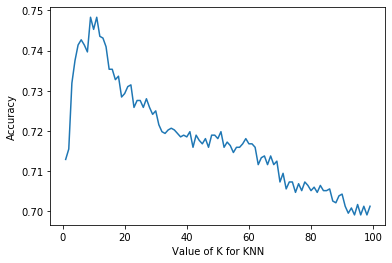

In [24]:
k_range=range(1,100)
k_scores=[]

for k in k_range:
    knn_classification_model=KNeighborsClassifier(n_neighbors=k)
    knn_classification_model.fit(train_X,train_Y)
    knn_predict=knn_classification_model.predict(test_X)
    score=(accuracy_score(knn_predict,test_Y))
    print(k,score)
    k_scores.append(score)
    
best_neighbor_count=np.argmax(k_scores)+1
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.show()

In [80]:
best_neighbor_count

9

4 0.7270691627006711
5 0.7318542195556348
6 0.7332792841463435
7 0.7336665332905368
8 0.7326367983965411
9 0.7350888866673054
10 0.7341791336175391
11 0.7341707423568603
12 0.7328807471155299
13 0.7328872678972944


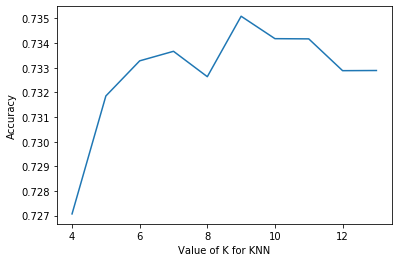

In [83]:
k_range=range(best_neighbor_count-5,best_neighbor_count+5,1)
k_scores=[]

for k in k_range:
    knn_classification_model=KNeighborsClassifier(n_neighbors=k)
    score=np.mean(cross_val_score(knn_classification_model,X,y,cv=10,scoring='accuracy'))
    print(k,score)
    k_scores.append(score)
    
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.show()

In [27]:
best_neighbor_count

9

In [28]:
start=time.time()
knn_classification_model=KNeighborsClassifier(n_neighbors=best_neighbor_count)
knn_classification_model.fit(train_X,train_Y)
knn_predict=knn_classification_model.predict(test_X)
knn_accuracy=(accuracy_score(knn_predict,test_Y))
knn_time=time.time() - start # 코드 실행 시간 계산

In [29]:
print(knn_accuracy,knn_time)

0.7482758620689656 1.8630194664001465


## LDA Classificiation

In [30]:
start=time.time()
lda_classification_model=LinearDiscriminantAnalysis()
lda_classification_model=lda_classification_model.fit(train_X,train_Y)
lda_predict=lda_classification_model.predict(test_X)

lda_accuracy=accuracy_score(lda_predict,test_Y)
lda_time=time.time()-start

In [31]:
print(lda_accuracy,lda_time)

0.7068965517241379 0.08676791191101074


## QDA Classificiation

In [32]:
start=time.time()
qda_classification_model=QuadraticDiscriminantAnalysis()
qda_classification_model=qda_classification_model.fit(train_X,train_Y)
qda_predict=lda_classification_model.predict(test_X)

qda_accuracy=accuracy_score(lda_predict,test_Y)
qda_time=time.time()-start

C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [33]:
print(qda_accuracy,qda_time)

0.7068965517241379 0.053844451904296875


## Decision Tree Classifier

In [34]:
start=time.time()
DT_Classification_Model=DecisionTreeClassifier(random_state=0)
DT_Classification_Model=DT_Classification_Model.fit(train_X,train_Y)
DT_Predict=DT_Classification_Model.predict(test_X)
dt_accuracy=accuracy_score(DT_Predict,test_Y)
dt_time=time.time()-start

In [35]:
print(dt_accuracy,dt_time)

0.653448275862069 0.15957355499267578


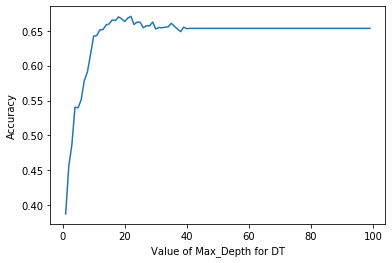

In [36]:
depth_range=range(1,100)
accuracy_scores=[]

for depth in depth_range:
    DT_Classification_Model=DecisionTreeClassifier(random_state=0,max_depth=depth)
    DT_Classification_Model=DT_Classification_Model.fit(train_X,train_Y)
    DT_Predict=DT_Classification_Model.predict(test_X)
    score=accuracy_score(DT_Predict,test_Y)
    accuracy_scores.append(score)
    
best_max_depth=np.argmax(accuracy_scores)+1
plt.plot(depth_range, accuracy_scores)
plt.xlabel('Value of Max_Depth for DT')
plt.ylabel('Accuracy')
plt.show()

In [37]:
print(best_max_depth)

22


In [38]:
start=time.time()
DT_Classification_Model=DecisionTreeClassifier(random_state=0,max_depth=best_max_depth)
DT_Classification_Model=DT_Classification_Model.fit(train_X,train_Y)
DT_Predict=DT_Classification_Model.predict(test_X)
dt_accuracy=accuracy_score(DT_Predict,test_Y)
dt_time=time.time()-start

In [39]:
print(dt_accuracy,dt_time)

0.6706896551724137 0.1186518669128418


## NN(Neural Network) Classifier

In [17]:
start=time.time()
NN_Classification_model=MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(2,5),random_state=0)
NN_Classification_model=NN_Classification_model.fit(train_X,train_Y)
NN_predict=NN_Classification_model.predict(test_X)
nn_accuracy=accuracy_score(NN_predict,test_Y)
nn_time=time.time()-start

In [18]:
print(nn_accuracy,nn_time)

0.4125 0.11768531799316406


In [19]:
hidden_nodes=range(1,11)
hidden_layers=range(1,11)
solvers=['lbfgs','sgd','adam']
best_nn_parameter={
    'solver':'lbfgs',
    'hidden_layer':(1,1),
    'max_accuracy':0
}
# params={
#     'solver':['lbfgs','sgd','adam'],
#     'hidden_layer_sizes':list(product(hidden_layers,hidden_nodes))
# }
# mlp_model=MLPClassifier(alpha=1e-5,random_state=0)
# mlp_model=GridSearchCV(mlp_model,params,n_jobs=5,cv=10,scoring='accuracy')
# mlp_model=mlp_model.fit(train_X,train_Y)
best_hidden_layer=(1,1)
for solver in solvers:
    accuracy_scores=list()
    layer_products=list(product(hidden_layers,hidden_nodes))
    for layer in layer_products:
        NN_Classification_model=MLPClassifier(solver=solver,alpha=1e-5,hidden_layer_sizes=layer,random_state=0)
        NN_Classification_model=NN_Classification_model.fit(train_X,train_Y)
        NN_predict=NN_Classification_model.predict(test_X)
        score=accuracy_score(NN_predict,test_Y)
        accuracy_scores.append(score)
    best_hidden_layer=layer_products[np.argmax(accuracy_scores)]
    print(solver,best_hidden_layer, np.max(accuracy_scores))
    if np.max(accuracy_scores) > best_nn_parameter['max_accuracy']:
        best_nn_parameter['solver']=solver
        best_nn_parameter['hidden_layer']=best_hidden_layer
        best_nn_parameter['max_accuracy']=np.max(accuracy_scores)

lbfgs (10, 7) 0.7556034482758621


C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

sgd (10, 10) 0.759051724137931


C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

adam (8, 8) 0.7706896551724138


C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [20]:
best_nn_parameter

{'solver': 'adam', 'hidden_layer': (8, 8), 'max_accuracy': 0.7706896551724138}

In [21]:
start=time.time()
NN_Classification_model=MLPClassifier(solver=best_nn_parameter['solver'],alpha=1e-5,hidden_layer_sizes=best_nn_parameter['hidden_layer'],random_state=0)
NN_Classification_model=NN_Classification_model.fit(train_X,train_Y)
NN_predict=NN_Classification_model.predict(test_X)
nn_accuracy=accuracy_score(NN_predict,test_Y)
nn_time=time.time()-start

C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [22]:
print(nn_accuracy,nn_time)

0.7706896551724138 4.915839195251465


## Bagging Ensemble Classifier

In [46]:
# iteration method
# train_X 에 있는 데이터에 대해서 해당 크기 만큼 복원 추출을 진행한다.
data_indexes=[index for index in range(train_X.shape[0])]
bagging_predicts=list()
start=time.time()
for _ in range(30):
    random_data_indexes=np.random.choice(data_indexes,size=train_X.shape[0])
    data_X=train_X.iloc[random_data_indexes]
    data_Y=train_Y.iloc[random_data_indexes]
    
    
    Logistic_Regression_model=LogisticRegression(random_state=0)
    Logistic_Regression_model=Logistic_Regression_model.fit(data_X,data_Y)
    bagging_predicts.append(Logistic_Regression_model.predict(test_X))
    
LR_predict=[]
for bagging_index in range(test_X.shape[0]):
    temp_result=list()
    for test_index in range(len(bagging_predicts)):
        temp_result.append(bagging_predicts[test_index][bagging_index])
    LR_predict.append(np.bincount(temp_result).argmax())
    
lr_accuracy=accuracy_score(LR_predict,test_Y)
lr_time=time.time()-start

C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

In [47]:
print(lr_accuracy,lr_time)

0.746551724137931 21.115541696548462


In [48]:
start=time.time()
LR_Bagging_model = BaggingClassifier(base_estimator = LogisticRegression(random_state=0), # 선형회귀모형
                                 n_estimators = 30, # 10번 샘플링
                                 verbose = False,
                                 random_state=0) # 학습 과정 표시
LR_Bagging_model = LR_Bagging_model.fit(train_X, train_Y) # 학습 진행
LR_Bagging_predict = LR_Bagging_model.predict(test_X) # 학습된 Bagging 선형 회귀 모형으로 평가 데이터 예측
bag_accuracy=accuracy_score(LR_Bagging_predict,test_Y)
bag_time=time.time()-start

C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

In [49]:
print(bag_accuracy,bag_time)

0.7495689655172414 19.059043645858765


In [50]:
start=time.time()
DT_Bagging_model = BaggingClassifier(base_estimator = DecisionTreeClassifier(max_depth=100), # 선형회귀모형
                                 n_estimators = 30, # 10번 샘플링
                                 verbose = False,
                                random_state=0) # 학습 과정 표시
DT_Bagging_model = DT_Bagging_model.fit(train_X, train_Y) # 학습 진행
DT_Bagging_predict = DT_Bagging_model.predict(test_X) # 학습된 Bagging 선형 회귀 모형으로 평가 데이터 예측
dt_bag_accuracy=accuracy_score(DT_Bagging_predict,test_Y)
dt_bag_time=time.time()-start

In [51]:
print(dt_bag_accuracy,dt_bag_time)

0.7474137931034482 2.168201446533203


In [52]:
start=time.time()
nn_Bagging_model = BaggingClassifier(base_estimator = MLPClassifier(solver='adam',alpha=1e-5,hidden_layer_sizes=best_hidden_layer,random_state=0), # 선형회귀모형
                                 n_estimators = 30, # 10번 샘플링
                                 verbose = False,
                                random_state=0) # 학습 과정 표시
nn_Bagging_model = nn_Bagging_model.fit(train_X, train_Y) # 학습 진행
nn_Bagging_predict = nn_Bagging_model.predict(test_X) # 학습된 Bagging 선형 회귀 모형으로 평가 데이터 예측
nn_bag_accuracy=accuracy_score(nn_Bagging_predict,test_Y)
nn_bag_time=time.time()-start

C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

In [53]:
print(nn_bag_accuracy,nn_bag_time)

0.7629310344827587 133.03430843353271


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


10 0.7331896551724137


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


20 0.7400862068965517


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


30 0.7452586206896552


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


40 0.7396551724137931


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


50 0.7474137931034482


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


60 0.7487068965517242


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


70 0.7495689655172414


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


80 0.75


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


90 0.7512931034482758


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


100 0.75


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


110 0.75


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


120 0.7504310344827586


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


130 0.7508620689655172


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


140 0.7525862068965518


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


150 0.7487068965517242


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


160 0.7512931034482758


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


170 0.7512931034482758


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


180 0.7504310344827586


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


190 0.7504310344827586


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


200 0.7525862068965518


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


210 0.7517241379310344


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


220 0.7538793103448276


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


230 0.7512931034482758


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


240 0.7530172413793104


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


250 0.7543103448275862


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


260 0.753448275862069


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


270 0.7530172413793104


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


280 0.7543103448275862


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


290 0.7556034482758621


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished


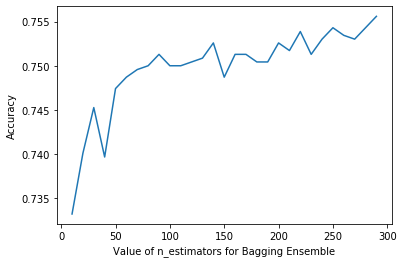

In [68]:
sample_ranges=range(10,300,10)
accuracy_scores=[]

for sample_size in sample_ranges:
    DT_Bagging_model = BaggingClassifier(base_estimator = DecisionTreeClassifier(max_depth=best_max_depth), # 선형회귀모형
                                 n_estimators = sample_size, # 10번 샘플링
                                 verbose = 1,
                                random_state=0) # 학습 과정 표시
    DT_Bagging_model = DT_Bagging_model.fit(train_X, train_Y) # 학습 진행
    DT_Bagging_predict = DT_Bagging_model.predict(test_X) # 학습된 Bagging 선형 회귀 모형으로 평가 데이터 예측
    score=accuracy_score(DT_Bagging_predict,test_Y)
    print(sample_size,score)
    accuracy_scores.append(score)
    
best_max_sample=np.argmax(accuracy_scores)*10+10
plt.plot(sample_ranges, accuracy_scores)
plt.xlabel('Value of n_estimators for Bagging Ensemble')
plt.ylabel('Accuracy')
plt.show()

In [69]:
best_max_sample

290

In [76]:
start=time.time()
DT_Bagging_model = BaggingClassifier(base_estimator = DecisionTreeClassifier(max_depth=best_max_depth), # 선형회귀모형
                                 n_estimators = best_max_sample,
                                 verbose = False,
                                random_state=0) # 학습 과정 표시
DT_Bagging_model = DT_Bagging_model.fit(train_X, train_Y) # 학습 진행
DT_Bagging_predict = DT_Bagging_model.predict(test_X) # 학습된 Bagging 선형 회귀 모형으로 평가 데이터 예측
dt_bag_accuracy=accuracy_score(DT_Bagging_predict,test_Y)
dt_bag_time=time.time()-start

In [77]:
print(dt_bag_accuracy,dt_bag_time)

0.7556034482758621 18.307053089141846


## Random Forest Tree Classifier

In [84]:
start=time.time()
RF_Classification_model = RandomForestClassifier(n_estimators = 30, # 20번 추정
                                             max_depth = 5, # 트리 최대 깊이 5
                                             random_state = 0) # 시드값 고정
RF_Classification_model = RF_Classification_model.fit(train_X, train_Y) # 학습 진행
RF_predict = RF_Classification_model.predict(test_X) # 학습된 Bagging 선형 회귀 모형으로 평가 데이터 예측
rf_accuracy=accuracy_score(RF_predict,test_Y)
rf_time=time.time()-start

In [85]:
print(rf_accuracy,rf_time)

0.6189655172413793 0.11369609832763672


1 0.40948275862068967
2 0.47370689655172415
3 0.5620689655172414
4 0.5814655172413793
5 0.6258620689655172
6 0.6474137931034483
7 0.665948275862069
8 0.6814655172413793
9 0.6866379310344828
10 0.7
11 0.7112068965517241
12 0.7103448275862069
13 0.7107758620689655
14 0.7155172413793104
15 0.7258620689655172
16 0.7271551724137931
17 0.718103448275862
18 0.7245689655172414
19 0.7318965517241379
20 0.7280172413793103
21 0.7288793103448276
22 0.7211206896551724
23 0.7353448275862069
24 0.7267241379310345
25 0.7379310344827587
26 0.7362068965517241
27 0.7267241379310345
28 0.7340517241379311
29 0.7310344827586207
30 0.7280172413793103
31 0.7254310344827586
32 0.7245689655172414
33 0.725
34 0.7362068965517241
35 0.7362068965517241
36 0.7288793103448276
37 0.7314655172413793
38 0.7241379310344828
39 0.7331896551724137
40 0.7331896551724137
41 0.7375
42 0.7336206896551725
43 0.7405172413793103
44 0.7245689655172414
45 0.7280172413793103
46 0.7340517241379311
47 0.7383620689655173
48 0.7349137931

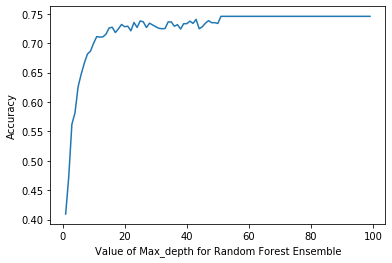

In [86]:
depth_ranges=range(1,100)
accuracy_scores=[]

for depth in depth_ranges:
    RF_Classification_model = RandomForestClassifier(n_estimators = 10, # 10번 추정
                                             max_depth = depth, 
                                             random_state = 0) # 시드값 고정
    RF_Classification_model = RF_Classification_model.fit(train_X, train_Y) # 학습 진행
    RF_predict = RF_Classification_model.predict(test_X) # 학습된 Bagging 선형 회귀 모형으로 
    score=accuracy_score(RF_predict,test_Y)
    print(depth,score)
    accuracy_scores.append(score)
    
best_max_depth_RF=np.argmax(accuracy_scores)+1
plt.plot(depth_ranges, accuracy_scores)
plt.xlabel('Value of Max_depth for Random Forest Ensemble')
plt.ylabel('Accuracy')
plt.show()

In [87]:
best_max_depth_RF

51

10 0.7456896551724138
20 0.7586206896551724
30 0.7650862068965517
40 0.7698275862068965
50 0.7668103448275863
60 0.7689655172413793
70 0.7698275862068965
80 0.7681034482758621
90 0.7655172413793103
100 0.7676724137931035
110 0.7689655172413793
120 0.7711206896551724
130 0.7659482758620689
140 0.7702586206896552
150 0.7737068965517241
160 0.7719827586206897
170 0.7702586206896552
180 0.7702586206896552
190 0.7706896551724138
200 0.7706896551724138
210 0.7702586206896552
220 0.7711206896551724
230 0.7719827586206897
240 0.7732758620689655
250 0.7724137931034483
260 0.7728448275862069
270 0.7732758620689655
280 0.7719827586206897
290 0.771551724137931


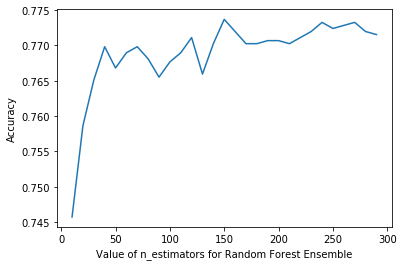

In [88]:
sample_ranges=range(10,300,10)
accuracy_scores=[]

for sample_size in sample_ranges:
    RF_Classification_model = RandomForestClassifier(n_estimators = sample_size, # 20번 추정
                                             max_depth = best_max_depth_RF, # 트리 최대 깊이 5
                                             random_state = 0) # 시드값 고정
    RF_Classification_model = RF_Classification_model.fit(train_X, train_Y) # 학습 진행
    RF_predict = RF_Classification_model.predict(test_X) # 학습된 Bagging 선형 회귀 모형으로 
    score=accuracy_score(RF_predict,test_Y)
    print(sample_size,score)
    accuracy_scores.append(score)
    
best_max_sample=np.argmax(accuracy_scores)*10+10
plt.plot(sample_ranges, accuracy_scores)
plt.xlabel('Value of n_estimators for Random Forest Ensemble')
plt.ylabel('Accuracy')
plt.show()

In [89]:
best_max_sample

150

In [90]:
start=time.time()
RF_Classification_model = RandomForestClassifier(n_estimators = best_max_sample, # 20번 추정
                                             max_depth = best_max_depth_RF, # 트리 최대 깊이 5
                                             random_state = 0) # 시드값 고정
RF_Classification_model = RF_Classification_model.fit(train_X, train_Y) # 학습 진행
RF_predict = RF_Classification_model.predict(test_X) # 학습된 Bagging 선형 회귀 모형으로 평가 데이터 예측
rf_accuracy=accuracy_score(RF_predict,test_Y)
rf_time=time.time()-start

In [91]:
print(rf_accuracy,rf_time)

0.7737068965517241 1.4670758247375488


## ADA Boost Classifier

In [92]:
start=time.time()
Ada_Classification_model = AdaBoostClassifier(base_estimator= LogisticRegression(random_state=0),
                                         n_estimators = 30, # 30번 추정
                                             random_state = 0) # 시드값 고정
Ada_Classification_model = Ada_Classification_model.fit(train_X, train_Y) # 학습 진행
Ada_predict = Ada_Classification_model.predict(test_X) # 학습된 Bagging 선형 회귀 모형으로 평가 데이터 예측
ada_accuracy=accuracy_score(Ada_predict,test_Y)
ada_time=time.time()-start

C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default mu

In [93]:
print(ada_accuracy,ada_time)

0.719396551724138 2.9650719165802


In [94]:
start=time.time()
Ada_Classification_model = AdaBoostClassifier(base_estimator= DecisionTreeClassifier(max_depth=best_max_depth,random_state=0),
                                         n_estimators = 30, # 30번 추정
                                             random_state = 0) # 시드값 고정
Ada_Classification_model = Ada_Classification_model.fit(train_X, train_Y) # 학습 진행
Ada_predict = Ada_Classification_model.predict(test_X) # 학습된 Bagging 선형 회귀 모형으로 평가 데이터 예측
ada_accuracy=accuracy_score(Ada_predict,test_Y)
ada_time=time.time()-start

In [95]:
print(ada_accuracy,ada_time)

0.7383620689655173 2.609025478363037


1 0.5849137931034483
2 0.6297413793103448
3 0.6616379310344828
4 0.5913793103448276
5 0.55
6 0.6064655172413793
7 0.5814655172413793
8 0.6163793103448276
9 0.6129310344827587
10 0.6375
11 0.6525862068965518
12 0.6663793103448276
13 0.6383620689655173
14 0.6616379310344828
15 0.6836206896551724
16 0.6995689655172413
17 0.6922413793103448
18 0.6982758620689655
19 0.6995689655172413
20 0.6974137931034483
21 0.7021551724137931
22 0.6935344827586207
23 0.7077586206896552
24 0.7172413793103448
25 0.7142241379310345
26 0.7198275862068966
27 0.7150862068965518
28 0.7262931034482759
29 0.7150862068965518
30 0.7125
31 0.7219827586206896
32 0.7168103448275862
33 0.7267241379310345
34 0.7340517241379311
35 0.7262931034482759
36 0.728448275862069
37 0.6422413793103449
38 0.6741379310344827
39 0.6801724137931034
40 0.6780172413793103
41 0.6530172413793104
42 0.6530172413793104
43 0.6530172413793104
44 0.6530172413793104
45 0.6530172413793104
46 0.6530172413793104
47 0.6530172413793104
48 0.653017241

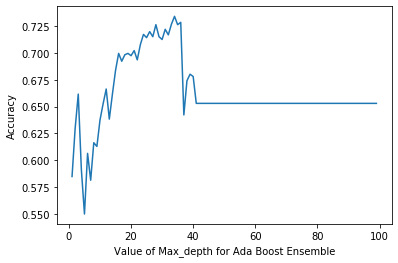

In [101]:
depth_ranges=range(1,100)
accuracy_scores=[]

for depth in depth_ranges:
    DT_Ada_model = AdaBoostClassifier(base_estimator= DecisionTreeClassifier(max_depth=depth,random_state=0),
                                         n_estimators = 10, # 10번 추정
                                             random_state = 0) # 시드값 고정
    DT_Ada_model = DT_Ada_model.fit(train_X, train_Y) # 학습 진행
    DT_Ada_predict = DT_Ada_model.predict(test_X) # 학습된 Bagging 선형 회귀 모형으로 평가 데이터 예측
    score=accuracy_score(DT_Ada_predict,test_Y)
    print(depth,score)
    accuracy_scores.append(score)
    
best_max_depth_ada=np.argmax(accuracy_scores)+1
plt.plot(depth_ranges, accuracy_scores)
plt.xlabel('Value of Max_depth for Ada Boost Ensemble')
plt.ylabel('Accuracy')
plt.show()

In [102]:
best_max_depth_ada

34

10 0.7340517241379311
20 0.7426724137931034
30 0.7418103448275862
40 0.753448275862069
50 0.7556034482758621
60 0.7577586206896552
70 0.756896551724138
80 0.7581896551724138
90 0.7607758620689655
100 0.7599137931034483
110 0.7599137931034483
120 0.7633620689655173
130 0.7633620689655173
140 0.7642241379310345
150 0.7655172413793103
160 0.7642241379310345
170 0.7603448275862069
180 0.7620689655172413
190 0.7642241379310345
200 0.7637931034482759
210 0.7629310344827587
220 0.7646551724137931
230 0.7642241379310345
240 0.7642241379310345
250 0.7650862068965517
260 0.7655172413793103
270 0.7650862068965517
280 0.7637931034482759
290 0.7633620689655173


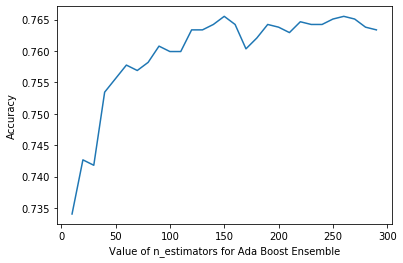

In [103]:
sample_ranges=range(10,300,10)
accuracy_scores=[]

for sample_size in sample_ranges:
    DT_Ada_model = AdaBoostClassifier(base_estimator= DecisionTreeClassifier(max_depth=best_max_depth_ada,random_state=0),
                                         n_estimators = sample_size, # 20번 추정
                                             random_state = 0) # 시드값 고정
    DT_Ada_model = DT_Ada_model.fit(train_X, train_Y) # 학습 진행
    DT_Ada_predict = DT_Ada_model.predict(test_X) # 학습된 Bagging 선형 회귀 모형으로 평가 데이터 예측
    score=accuracy_score(DT_Ada_predict,test_Y)
    print(sample_size,score)
    accuracy_scores.append(score)
    
best_max_sample_ada=np.argmax(accuracy_scores)*10+10
plt.plot(sample_ranges, accuracy_scores)
plt.xlabel('Value of n_estimators for Ada Boost Ensemble')
plt.ylabel('Accuracy')
plt.show()

In [104]:
best_max_sample_ada

150

In [105]:
start=time.time()
Ada_Regression_model = AdaBoostClassifier(base_estimator= DecisionTreeClassifier(random_state=0,max_depth=best_max_depth_ada),
                                         n_estimators = best_max_sample_ada, 
                                             random_state = 0
                                        ) # 시드값 고정
Ada_Regression_model = Ada_Regression_model.fit(train_X, train_Y) # 학습 진행
Ada_predict = Ada_Regression_model.predict(test_X) # 학습된 Bagging 선형 회귀 모형으로 평가 데이터 예측
ada_accuracy=accuracy_score(Ada_predict,test_Y) # RMSE
ada_time=time.time() - start # 코드 실행 시간 계산

In [106]:
print(ada_accuracy,ada_time)

0.7655172413793103 15.066715478897095


## Xgb Boost Classifier

In [127]:
#machine model의 optimzied hyper parameter을 찾기 위한 함수
def optimize_model(model, params, cv):
    model=GridSearchCV(model,params,n_jobs=5,cv=cv)
    model=model.fit(train_X,train_Y)
    
    print(model.best_params_)
    
    return model


In [109]:
start=time.time()
xgb_model=xgb.XGBClassifier(n_estimators=30,objective='binary:logistic',max_depth=10,learning_rate=0.01,
                            random_state=0)
xgb_model=xgb_model.fit(train_X,train_Y)
xgb_model_predict=xgb_model.predict(test_X)
xgb_accuracy=accuracy_score(xgb_model_predict,test_Y)
xgb_time=time.time()-start

In [110]:
print(xgb_accuracy,xgb_time)

0.7336206896551725 3.9225118160247803


In [162]:
start=time.time()
xgb_model=xgb.XGBClassifier(n_estimators=300,objective='binary:logistic',
                            max_depth=30,learning_rate=0.1,
                            random_state=0)
xgb_model=xgb_model.fit(train_X,train_Y)
xgb_model_predict=xgb_model.predict(test_X)
xgb_accuracy=accuracy_score(xgb_model_predict,test_Y)
xgb_time=time.time()-start
print(xgb_accuracy,xgb_time)

0.7797413793103448 67.4756281375885


In [168]:
xgb_param = {'max_depth': [1,5,10,20,30,40,50,60,70,80,90,100], # 트리 깊이
         'n_estimators': np.arange(10,300,10), # Number of trees, 트리 생성 개수
            }
xgb_model=xgb.XGBClassifier(objective='binary:logistic',learning_rate=0.01,num_class=len(set(train_Y)) + 1)
clf=GridSearchCV(xgb_model,xgb_param,n_jobs=5,cv=10,verbose=True)

In [169]:
print(clf)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.01, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constra...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=False,
                                     

In [ ]:
clf=clf.fit(train_X,train_Y)
xgb_model_predict = clf.predict(test_X) # 평가 데이터 예측
print(accuracy_score(xgb_model_predict,test_Y))

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


In [ ]:
xgb_model=xgb.XGBClassifier(learning_rate=0.01,objective='multi:softmax',num_class=len(set(train_Y)) + 1)
xgb_param = {'max_depth': [1,5,10,20,30,40,50,60,70,80,90,100], # 트리 깊이
             # Step Size
            'n_estimators': np.arange(10,300,10), # Number of trees, 트리 생성 개수
            } # 파라미터 추가, Label must be in [0, num_class) -> num_class보다 1 커야한다.

cv=StratifiedKFold(n_splits=10,shuffle=False,random_state=0)

xgb_model=optimize_model(xgb_model,xgb_param,cv)

In [ ]:
start=time.time()
xgb_model=xgb.XGBClassifier(n_estimators=xgb_model.best_params_['n_estimators'],max_depth=xgb_model.best_params_['max_depth'],learning_rate=0.01,objective='multi:softmax','num_class': len(set(train_Y)) + 1)
xgb_predict=xgb_model.predict(test_X)
xgb_accuracy=accuracy_score(xgb_predict,test_Y)
xgb_time=time.time()-start

In [ ]:
print(xgb_accuracy,xgb_time)

## LightGbm Classifier

In [112]:
start=time.time()
lgb_model=lgb.LGBMClassifier(n_estimator=30,max_depth=10,learning_rate=0.01,random_state=0,objective='multiclass', # 목적 함수
            num_class=len(set(train_Y)) + 1)
lgb_model=lgb_model.fit(train_X,train_Y)
lgb_model_predict = lgb_model.predict(test_X)
lgb_accuracy=accuracy_score(lgb_model_predict,test_Y)
lgb_time=time.time()-start

In [113]:
print(lgb_accuracy,lgb_time)

0.7258620689655172 2.128309488296509


In [148]:
start=time.time()
lgb_model=lgb.LGBMClassifier(n_estimator=300,max_depth=30,
                             learning_rate=0.1,random_state=0,
                             objective='multiclass',num_class=len(set(train_Y)) + 1)
lgb_model=lgb_model.fit(train_X,train_Y)
lgb_model_predict = lgb_model.predict(test_X)
lgb_accuracy=accuracy_score(lgb_model_predict,test_Y)
lgb_time=time.time()-start
print(lgb_accuracy,lgb_time)

0.7836206896551724 2.284890651702881


In [ ]:
lgb_model=lgb.LGBMClassifier(learning_rate=0.01,objective='multiclass', # 목적 함수
            num_class=len(set(train_Y)) + 1)
lgb_param = {'max_depth': [1,5,10,20,30,40,50,60,70,80,90,100], # 트리 깊이
             # Step Size
            'n_estimators': np.arange(10,300,10), # Number of trees, 트리 생성 개수
            } # 파라미터 추가, Label must be in [0, num_class) -> num_class보다 1 커야한다.

cv=StratifiedKFold(n_splits=10,shuffle=False,random_state=0)

lgb_model=optimize_model(lgb_model,lgb_param,cv)

In [ ]:
lgb_model

In [99]:
start=time.time()
lgb_model=lgb.LGBMClassifier(n_estimators=lgb_model.best_params_['n_estimators'],max_depth=lgb_model.best_params_['max_depth'],learning_rate=0.01,random_state=0,objective='multiclass', # 목적 함수
            num_class=len(set(train_y)) + 1)
lgb_model=lgb_model.fit(train_X,train_Y)
lgb_model_predict = lgb_model.predict(test_X)
lgb_accuracy=accuracy_score(lgb_model_predict,test_Y)
lgb_time=time.time()-start

RMSE: 210904.17249451784
Time: 0.84 seconds


In [ ]:
print(lgb_accuracy,lgb_time)

## Catboost Classifier

In [153]:
start=time.time()
cb_model=cat.CatBoostClassifier(n_estimators=30,max_depth=10,learning_rate=0.01,random_state=0,
                                eval_metric='Accuracy',
                                loss_function='MultiClass')
cb_model=cb_model.fit(train_X,train_Y)
cb_model_predict = cb_model.predict(test_X)

cat_accuracy=accuracy_score(cb_model_predict,test_Y)
cat_time=time.time()-start

0:	learn: 0.5074848	total: 257ms	remaining: 7.45s
1:	learn: 0.5732767	total: 514ms	remaining: 7.2s
2:	learn: 0.5812234	total: 583ms	remaining: 5.25s
3:	learn: 0.5795602	total: 830ms	remaining: 5.4s
4:	learn: 0.5801146	total: 1.07s	remaining: 5.33s
5:	learn: 0.5810386	total: 1.34s	remaining: 5.34s
6:	learn: 0.5932360	total: 1.65s	remaining: 5.44s
7:	learn: 0.5921271	total: 1.97s	remaining: 5.42s
8:	learn: 0.5969322	total: 2.25s	remaining: 5.25s
9:	learn: 0.5982258	total: 2.51s	remaining: 5.03s
10:	learn: 0.6015524	total: 2.77s	remaining: 4.79s
11:	learn: 0.6039549	total: 3.06s	remaining: 4.59s
12:	learn: 0.6041397	total: 3.34s	remaining: 4.36s
13:	learn: 0.6074663	total: 3.63s	remaining: 4.14s
14:	learn: 0.6072815	total: 3.88s	remaining: 3.88s
15:	learn: 0.6089447	total: 4.14s	remaining: 3.63s
16:	learn: 0.6106080	total: 4.39s	remaining: 3.36s
17:	learn: 0.6117169	total: 4.64s	remaining: 3.1s
18:	learn: 0.6152282	total: 4.89s	remaining: 2.83s
19:	learn: 0.6181852	total: 5.13s	remaining:

In [122]:
print(cat_accuracy,cat_time)

0.6573275862068966 6.282172918319702


In [ ]:
cgb_model=cat.CatBoostClassifier(learning_rate=0.01,objective='MultiClass', # 목적 함수
            eval_metric='Accuracy')
cgb_param = {'max_depth': [1,5,10,20,30,40,50,60,70,80,90,100], # 트리 깊이
            'n_estimators': np.arange(10,300,10), #estimator 개수
            }

cv=StratifiedKFold(n_splits=10,shuffle=False,random_state=0)

cgb_model=optimize_model(cgb_model,cgb_param,cv)

In [ ]:
print(cat_accuracy,cat_time)

In [ ]:
start=time.time()
cb_model=cat.CatBoostClassifier(n_estimators=300,max_depth=16,learning_rate=0.1,random_state=0,
                                eval_metric='Accuracy',
                                loss_function='MultiClass',
                                verbose=True)
cb_model=cb_model.fit(train_X,train_Y)
cb_model_predict = cb_model.predict(test_X)

cat_accuracy=accuracy_score(cb_model_predict,test_Y)
cat_time=time.time()-start
print(cat_accuracy,cat_time)

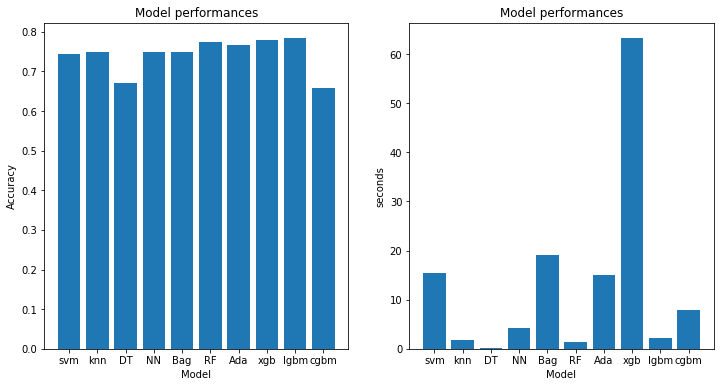

In [160]:
accuracy_scores=[
    svm_accuracy,
    knn_accuracy,
    dt_accuracy,
    nn_accuracy,
    bag_accuracy,
    rf_accuracy,
    ada_accuracy,
    xgb_accuracy,
    lgb_accuracy,
    cat_accuracy
]
times=[
    svm_time,
    knn_time,
    dt_time,
    nn_time,
    bag_time,
    rf_time,
    ada_time,
    xgb_time,
    lgb_time,
    cat_time
]
labels=['svm',
       'knn',
       'DT',
       'NN',
       'Bag',
       'RF',
       'Ada',
       'xgb',
       'lgbm',
       'cgbm']

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.bar(labels,accuracy_scores)
plt.title('Model performances')
plt.xlabel('Model')
plt.ylabel('Accuracy')

plt.subplot(122)
plt.bar(labels,times)
plt.title('Model performances')
plt.xlabel('Model')
plt.ylabel('seconds')

plt.savefig('Comparing Model_performances(Classification).png')
plt.show()

## Ensemble of Ensemble

In [40]:
#제일 기본적인 ensemble model만 생성/ 비교를 위해서
DT_Bagging_model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                  random_state=0)
RF_Classification_model=RandomForestClassifier(random_state=0)
DT_Ada_model=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),
                                      random_state=0)
xgb_model=xgb.XGBClassifier(verbose=True)
lgb_model=lgb.LGBMClassifier(verbose=True)
cat_model=cat.CatBoostClassifier(verbose=True)

def bagging_ensemble(model):
    start=time.time()
    bagging_model=BaggingClassifier(base_estimator = model, # 회귀모형
                                     n_estimators = 100, # 50번 샘플링
                                    random_state=0) 
    bagging_model=bagging_model.fit(train_X,train_Y)
    bagging_predict=bagging_model.predict(test_X)
    return time.time()-start, accuracy_score(bagging_predict,test_Y)

def ada_ensemble(model):
    start=time.time()
    ada_boosting_model=AdaBoostClassifier(base_estimator=model,
                                      n_estimators=100,
                                      random_state=0)
    ada_boosting_model=ada_boosting_model.fit(train_X,train_Y)
    ada_predict=ada_boosting_model.predict(test_X)
    return time.time()-start, accuracy_score(ada_predict,test_Y)

models=[DT_Bagging_model, 
        RF_Classification_model, 
        DT_Ada_model, 
        xgb_model, 
        lgb_model,
        cat_model
]

ensemble_methods=[bagging_ensemble,ada_ensemble]


ensemble_ensemble_performances=list()
for method in ensemble_methods:
    model_performances={
    'times':list(),
    'accuracy_scores':list()
    }
    for model in models:
        print(model)
        model_performance=method(model)
        model_performances['times'].append(model_performance[0])
        model_performances['accuracy_scores'].append(model_performance[1])

    ensemble_ensemble_performances.append(model_performances)



BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jhyun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                          

LightGBMError: Parameter verbosity should be of type int, got "True"

In [165]:
ensemble_ensemble_performances

[{'times': [21.48958158493042,
   3.732022523880005,
   3.6731550693511963,
   280.7044892311096,
   37.183584213256836,
   409.674587726593],
  'accuracy_scores': [0.7616379310344827,
   0.7538793103448276,
   0.7525862068965518,
   0.7836206896551724,
   0.6353448275862069,
   0.6551724137931034]},
 {'times': [30.52338981628418,
   6.172528266906738,
   0.12769222259521484,
   111.55998110771179,
   0.9614291191101074,
   413.06067728996277],
  'accuracy_scores': [0.753448275862069,
   0.7422413793103448,
   0.6525862068965518,
   0.27025862068965517,
   0.7525862068965518,
   0.7530172413793104]}]

In [185]:
ensemble_ensemble_performances[0]['accuracy_scores']=[element*100 for element in ensemble_ensemble_performances[0]['accuracy_scores']]
ensemble_ensemble_performances[1]['accuracy_scores']=[element*100 for element in ensemble_ensemble_performances[1]['accuracy_scores']]

In [186]:
ensemble_ensemble_performances

[{'times': [21.48958158493042,
   3.732022523880005,
   3.6731550693511963,
   280.7044892311096,
   37.183584213256836,
   409.674587726593],
  'accuracy_scores': [76.16379310344827,
   75.38793103448276,
   75.25862068965517,
   78.36206896551724,
   63.53448275862069,
   65.51724137931035]},
 {'times': [30.52338981628418,
   6.172528266906738,
   0.12769222259521484,
   111.55998110771179,
   0.9614291191101074,
   413.06067728996277],
  'accuracy_scores': [75.3448275862069,
   74.22413793103448,
   65.25862068965517,
   27.025862068965516,
   75.25862068965517,
   75.30172413793103]}]

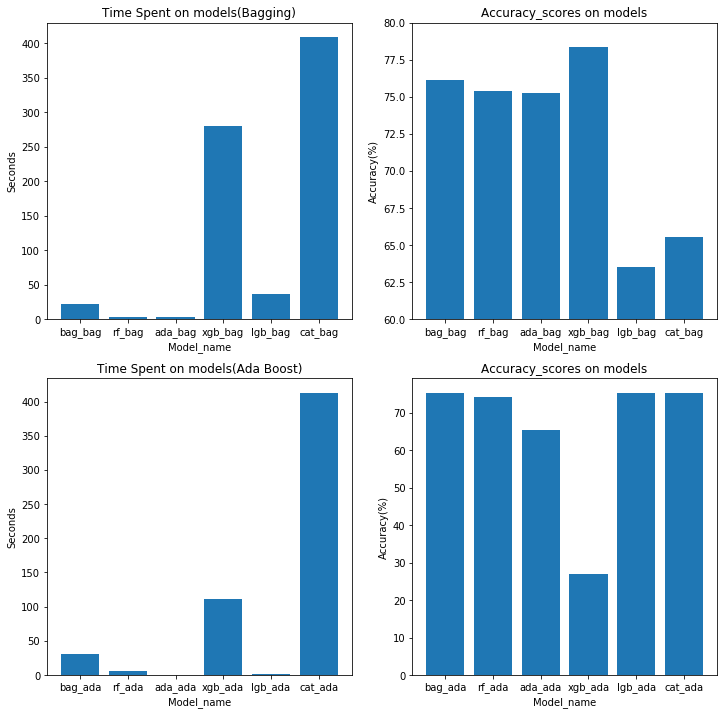

In [189]:
bag_labels=['bag_bag',
       'rf_bag',
       'ada_bag',
       'xgb_bag',
       'lgb_bag',
       'cat_bag']

ada_labels=['bag_ada',
       'rf_ada',
       'ada_ada',
       'xgb_ada',
       'lgb_ada',
       'cat_ada']

plt.figure(figsize=(12,12))
plt.subplot(221)
plt.bar(bag_labels,ensemble_ensemble_performances[0]['times'])
plt.title('Time Spent on models(Bagging)')
plt.ylabel('Seconds')
plt.xlabel('Model_name')
plt.subplot(222)
plt.bar(bag_labels,ensemble_ensemble_performances[0]['accuracy_scores'])
plt.ylim(60,80)
plt.title('Accuracy_scores on models')
plt.ylabel('Accuracy(%)')
plt.xlabel('Model_name')


plt.subplot(223)
plt.bar(ada_labels,ensemble_ensemble_performances[1]['times'])
plt.title('Time Spent on models(Ada Boost)')
plt.ylabel('Seconds')
plt.xlabel('Model_name')
plt.subplot(224)
plt.bar(ada_labels,ensemble_ensemble_performances[1]['accuracy_scores'])
plt.title('Accuracy_scores on models')
plt.ylabel('Accuracy(%)')
plt.xlabel('Model_name')

plt.savefig('Comparing ensemble_ensemble models(Classification).png')
plt.show()